<center>
    <img src="https://cds.cern.ch/record/1306150/files/cmsLogo_image.jpg" width="300" alt="cognitiveclass.ai logo"  />
    
</center>

# Pile Up Study at the CMS experiment in 2018

Go to <a href=#bookmark10> Run Cell </a>
<br>
Go to <a href=#bookmark11> Luminosity Distributions </a>
<br>
Go to <a href=#bookmark5> Best Fit Cross Section </a>
<br>
Go to <a href=#bookmark4> Post Fit total  </a>
<br>
Go to <a href=#bookmark1>Hamed Pull and Fit Quality </a>
<br>
Go to <a href=#bookmark6>Nadjieh Pull and Fit Quality </a>
<br>
Go to <a href=#bookmark7> Nima Pull and Fit</a>
<br>


Go to <a href=#bookmark2>New Pull Plot and Fit (SD) </a>
<br>
Go to <a href=#bookmark3>Summary (SD) </a>
<br>
Go to <a href=#bookmark9> Nima Weighted Pull and Fit</a>

<br>
Go to <a href=#bookmark8> weighted Fit for all runs</a>
<br>
Go to <a href=#bookmark14> Summary of All plots</a>
<br>
Go to <a href=#bookmark15> other features of code</a>




### importing libraries and classes


In [1]:
from __future__ import annotations
import uproot
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import statistics

import random    
import plotly
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from typing import overload
from abc import ABC, abstractmethod
import sympy
from sympy.integrals.transforms import laplace_transform
import random
import math
from tqdm.auto import tqdm, trange
from concurrent.futures import ThreadPoolExecutor
import scipy.stats as stats
from scipy.optimize import curve_fit


from Class1 import parametricValue

    
from Class1 import fixedValue


from Class1 import parametricValueNumpy


from Class1 import parametricValueSympy


#these are important for me

from Class1 import binning


from Class1 import discretepdf


from Class1 import NLL


from Class1 import lumiDist


from Class1 import lumiDistSympyLaplace


from Class1 import lumiDistNumpy


from Class1 import SimulationVSPu


In [2]:
from Class1 import RunInfo


## choosing Runs and Eras

In [3]:
from allInfo import GetAllRuns, GetAllEras

year =2018
GetAllEras(year)

['B', 'A']

In [4]:
# year = 2018
# eras = GetAllEras(year)
# era = '1'
# allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )

In [5]:
# year =2018
# eras = ['A' , 'B']
# # for era in GetAllEras(year):
# for era in eras:
#     allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
#     print(era, ':' , allRuns)

In [6]:
# A_allRuns = sorted( list(set( GetAllRuns(2018 , 'A') ) ) )
# B_allRuns = sorted( list(set( GetAllRuns(2018 , 'B') ) ) )
# print('era A has {0} runs'.format(len(A_allRuns)))
# print('era B has {0} runs'.format(len(B_allRuns)))

In [7]:
# Runs = allRuns[: :5]
# Runs

In [8]:
# year , era = 2018 , 'A'
# allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
# allRuns = allRuns[22:24]
# allRuns

In [9]:
# allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
# Runs = allRuns[23:28]
# if len(Runs) == 1:
#     ind = allRuns.index(Runs[0])
#     runName = 'RunNo:{0}'.format(ind+1)
# else:
#     runName = 'nRuns={0}'.format(len(Runs))
# runName

## Run Cell <a name='bookmark10' />

In [10]:
web1 = '/eos/user/c/cmstandi/SWAN_projects/Nima/PUFit' # source directory
web2 = '/eos/user/c/cmstandi/www/PU/newres/New' # publish directory

#Experiment Number:
expN = 1000 # change this every time you want to run new feature. 

from pathlib import Path

import sys
sys.path.append('../nTuplizer')

from allInfo import GetAllRuns, GetAllEras

def export_graph(g , n , pname, pdir):
    ghtml = g.to_html()
    Path('{0}/{1}/'.format(pdir , pname) ).mkdir(parents=True, exist_ok=True)
    with open('{0}/{1}/{2}.html'.format(pdir , pname , n) , 'w') as f:
        f.write(ghtml)
def publish_res(rinfo , gchi2 , vname ,  name , publish_dir):

    
    
    
    gg = rinfo.plot_lumi_distribution(subRuns=-1 , colorLumiScale=4 , density=False)
    

    export_graph(gg , '01-lumi_distribution' , name , publish_dir)
    
    
    
    
    #02-pu_distribution
    
    gg = rinfo.plotPUDists(70)
    export_graph(gg , '02-pu_distribution' , name , publish_dir)
    
    
    
    
    
    #03-{vname}_distribution:
    
    if rinfo.parentRun is None:
        gg = rinfo.plotDataDist(zoom=True)
        export_graph(gg , '03-{0}_distribution'.format(vname) , name , publish_dir) 

    
    
    
    #04-{vname}_predictions:

    gg = rinfo.plotPredictions([60,65,75,80,90])
    export_graph(gg , '04-{0}_predictions'.format(vname) , name , publish_dir)
    
        
        
        
        
    for _xsec in [60,65,75,80,90]:
        gg = rinfo.plotRunPredictions(_xsec)
        export_graph(gg , '05-{0}_predictions_xsec{1}'.format(vname , _xsec) , name , publish_dir)
            
    
    
    export_graph(gchi2 , '06-bestfit_details'  , name , publish_dir)
    export_graph(rinfo.postFitPlots(), '07-postFit_plots'  , name , publish_dir)
    export_graph(rinfo.pullPlots(50 , 1.3) , '08-pullPlots' , name , publish_dir)
    export_graph(rinfo.NadjiehPullPlots(50 , 1.3) , '08-NadjiehPullPlots' , name , publish_dir)
    
    
    
    
    
    if rinfo.parentRun is None:
        export_graph(rinfo.aggregateFitRes() , '09-summary1' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes2() , '09-summary2' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes3() , '09-summary3' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes4() , '09-summary4' , name ,publish_dir)
        
        
   
rinfo = None
        
def process_and_publish(year , era , vname , vmin , vmax , vnbins , pu_max ,
                        lumiName = 'PHYSICSDel' , 
                        ### look for Choosing Lumi-quantile cell below
#                         lumiQ =  np.array([0,1.0]) ,
#                         lumiQ =  np.array([0,0.01 , 0.1, 0.9,1.0]) ,
                        lumiQ =  np.array([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) ,

#                         lumiQ =  np.array([0,0.001,0.055,0.115,0.255,0.365, 0.455,0.515,0.665,0.785,0.935,1.0]) ,
                        lnbins_per_q = 20,
                        xsec = np.arange(30,100,1), nthreads = 30 , publish_dir = web2 ):
    nbins = lumiQ.size -1
  #  print(nbins)  
    
    #Runs
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
#     Runs = allRuns[0:2]
    Runs = allRuns[::2]
    if len(Runs) == 1:
        ind = allRuns.index(Runs[0])
        runName = 'RunNo:{0}'.format(ind+1)
    else:
        runName = 'nRuns={0}'.format(len(Runs))
    runName
    
    
    
    head = 'expe={0}_{1}{2}_nLumiBins={3}_{4}'.format(expN,era, year,nbins , runName)
    name = '{0}/{1}'.format(head, vname)
    
    
    #00simulation plot:
    
    var_bins = np.linspace(vmin,vmax,vnbins+1)
    simDist = SimulationVSPu(vname , year = year , var_bins=var_bins , pu_max=pu_max , nthreads=nthreads)


    g = simDist.plot(param=1 , label = 'PU = 1')
    for i in range(10,90+1,10):
        theName = 'PU = {0}'.format(i)
        simDist.plot(param=i , g=g , 
                     scatterOpts={ 'name':theName}
                    )

    g.update_layout(
        title="Simulated distribution for PU ",
        xaxis_title= vname,
        yaxis_title="probability",
        legend_title="PU number",
        autosize=False,
        width=1000,
        height=500,
    )    
    export_graph(g , '00-Simulation' , name , publish_dir )
    
    
    
    

    
    
    
    print('is going to run over {0} runs'.format( len(Runs)) )
    print('Number of Lumi Bins = {0}'.format(nbins))

    
    rinfo = RunInfo(0 , vname , var_bins , lumiName ,lumiQ , nbins_perq=lnbins_per_q , sub_runs=Runs , 
                    nthreads=nthreads , xsecs = xsec)
    
    rinfo.setSimulation(simDist)
    gchi2 = rinfo.fit()
    
#     print(vname)
#     print(var_bins)
#     print(lumiName)
#     print(lumiQ)
#     print(lnbins_per_q)
    
    try:
        
        publish_res(rinfo , gchi2 , vname , name , publish_dir)
        for sr in rinfo._subRuns : #+ rinfo._subRunsSameLumiBins:
            #ext = '/SRSimilarBinning' if sr._isSecondHand else '/SRSameBinning'
            publish_res(sr , None , vname , vname , '{0}/{1}/Runs/Run{2}'.format(publish_dir , head , sr.run) )
    except Exception as e:
        print(e)
        return head, rinfo

    #del rinfo
    #del simDist
    

    return head, rinfo
 

    

In [11]:
variables = { 
              "nVertices" : ( "nVertices" , 90 , 0 , 90 ) ,
              "nGoodVertices" : ("nGoodVertices", 80, 0 , 80) ,
              "nEles" : ("nEles" , 10 , 0 , 10 ) ,
              "nMus" : ("nMus" , 10 , 0 , 10 ),
              "nChargedHadrons" : ("nChargedHadrons" , 250 , 0 , 2500 ),
              "nLostTracks": ("nLostTracks" , 35 , 0 , 35 ),
              "nPhotons" : ("nPhotons" , 120 , 0 , 600 ),
              "nNeutralHadrons" : ("nNeutralHadrons" , 60 , 0 , 120 ),
              "fixedGridRhoAll" : ("fixedGridRhoAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAll" : ("fixedGridRhoFastjetAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAllCalo" : ("fixedGridRhoFastjetAllCalo" , 25 , 0 , 25 ),
              "fixedGridRhoFastjetCentral" : ("fixedGridRhoFastjetCentral" , 50 , 0 , 50 ),
              "fixedGridRhoFastjetCentralCalo" : ("fixedGridRhoFastjetCentralCalo" , 20 , 0 , 20 ),
              "fixedGridRhoFastjetCentralChargedPileUp" : ("fixedGridRhoFastjetCentralChargedPileUp" , 35 , 0 , 35 ),
              "fixedGridRhoFastjetCentralNeutral" : ("fixedGridRhoFastjetCentralNeutral" , 12 , 0 , 12 )
            }

vvv = {}
year , era = 2018 , 'A'
for v,vinfo in variables.items():
     head , vvv[v]  = process_and_publish(year , era , vinfo[0] , vinfo[2] , vinfo[3] , vinfo[1] , 90  )
        

  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 59 runs
Number of Lumi Bins = 11


  0%|          | 0/143 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/25 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/129 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315641]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315267]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315257]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315555]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316061]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316186]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315264]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316082]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315489]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315705]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315322]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316111]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315800]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315644]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315690]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315784]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315648]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315506]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315974]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315512]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315557]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315703]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315786]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315420]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315646]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316059]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315764]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315357]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 315840]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316721]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316719]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316380]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316715]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316667]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316877]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316239]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316361]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316717]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316615]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316470]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316766]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316363]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316216]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316114]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316218]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316505]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316241]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316201]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316457]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316928]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316723]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316378]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316701]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316993]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316590]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316995]

  0%|          | 0/11 [00:00<?, ?it/s, RUN 316199]

  0%|          | 0/119 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


## name of this Experiment: uses in naming folders

In [12]:
head

'expe=1000_A2018_nLumiBins=11_nRuns=59'

In [13]:
# Define a color generator function
def generate_color():
    color = '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color

## making directories for overviewPlots both in source and publish directories

In [14]:
# overview for publish
import os

directory = "{0}/overview".format(head)
  
# Parent Directory path
parent_dir = web2
  
# Path
path = os.path.join(parent_dir, directory)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

In [15]:
#overviewPlots for source
import os

directory1 = 'overviewPlots/{0}'.format(head)
  
# Parent Directory path
parent_dir1 = web1
  
# Path
path = os.path.join(parent_dir1, directory1)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

### costume template for plots

In [248]:
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Nunito",
            "size": 14,
            "color": "#707070",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 18,
                "color": "#1f1f1f",
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
        legend = dict(font = dict(family = "Nunito", size = 12, color = "black")),
#         legend_title = dict(font = dict(family = "Courier", size = 10, color = "blue"))
    )
}

# Luminosity and PileUp dists:

In [16]:
def export_Graph(g , n , pdir):
    ghtml = g.to_html()
    Path('{0}/'.format(pdir ) )
    with open('{0}/{1}.html'.format(pdir , n) , 'w') as f:
        f.write(ghtml)

In [17]:
# G = vvv['nVertices'].lumi_distribution.plot()
# export_Graph(G , 'LumiDist', '{0}/{1}/'.format(parent_dir,directory))
# G


### Choosing Lumi-quantile

In [18]:
L = vvv['nVertices'].lumi_distribution.bins_array
# L

In [19]:
# ### based on lumi_distribution.plot()
# l = vvv['nVertices'].lumi_distribution.bins_array
# # l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# lumi_q = np.array([0,0.055,0.115,0.365,0.785,0.935,1.0])
# lumi_Limit = np.quantile(l , lumi_q)
# lumi_Limit

In [20]:
# s = vvv['nVertices']._subRuns
# s[0].plot_lumi_distribution()

### lumi bins:

In [21]:
### lumi limits for every point
s = vvv['nVertices']._subRuns[0].all_lumi_bins
# print(s)
# print(len(s))
Bin_Rep = []
for i in range(len(s)-1):
#     print(i , s[i])
    bin_rep = ((s[i] + s[i+1])/2)
    Bin_Rep.append(bin_rep)
# print(Bin_Rep)

In [22]:
v = vvv['nVertices']._subRuns[0].vals
# v

In [23]:
# vvv['nVertices']._subRuns
# vvv['nVertices']._subRuns[0].run



### luminosity distribution for every Runs

## Luminosity Distribution with Binning:  <a name='bookmark11' />

In [289]:
def LumiDist(variable , density):
    G = vvv[variable].plot_lumi_distribution(density = density)
    
    
    
    G.update_layout(
            template = custom_template,
            autosize=False,
            width=1000,
            height=500,
            )
    if density:
        G.update_layout(
        yaxis_title="Events")
    export_Graph(G , 'LumiDistBining{0}'.format(density), '{0}/{1}/'.format(parent_dir,directory))
    return G

In [290]:
LumiDist('nVertices' , density = False)

## Luminosity Distribution without binning

In [291]:
LumiDist('nVertices' , density = True)


# Luminosity Dist for each Run:

In [27]:
# np.set_printoptions(threshold=sys.maxsize)
# for j in range(len(vvv['nVertices']._subRuns)):
#     Prob = []
# #     v = np.sort(vvv['nVertices']._subRuns[j].vals['PHYSICSDel'])
#     s = vvv['nVertices']._subRuns[j].all_lumi_bins

#     # print(v)
#     Bin_Rep = []
#     Counter = 0
#     for i in range(len(s)-1):
#         bin_rep = ((s[i] + s[i+1])/2)
#         Bin_Rep.append(bin_rep)
#         counter = 0
#         for val in v:
#             if s[i] <= val <=s[i+1]:
#                 counter+=1
#     #     print(counter)
#         Counter+=counter
#         prob = counter/len(v)
#         Prob.append(prob)
# #         print('Prob for Bin Rep = {0} : {1}'.format(Bin_Rep[i],prob))
#     print('Number of measured luminosity in Run: {0} = {1} '.format(vvv['nVertices']._subRuns[j].run , Counter))
# #     print(len(v))
#     print(sum(Prob))
#     plt.plot(Bin_Rep , Prob)
#     plt.title('Run: {0}'.format(vvv['nVertices']._subRuns[j].run))
#     plt.xlabel('Luminosity')
#     plt.ylabel('Probability')
#     plt.show()

In [293]:
g = None
density = True
subRuns = -1
g = vvv['nVertices'].lumi_distribution.plot(g=g, scatterOpts=dict(mode='markers') , density=density )
for sr in vvv['nVertices']._subRuns if subRuns > 0 else vvv['nVertices']._subRunsSameLumiBins:
    g = sr.plot_lumi_distribution(g, subRuns ,density=density )
        ###
g.update_layout(
            template = custom_template,
            autosize=False,
            width=1000,
            height=750,
            legend_traceorder="normal"
            )
if density:
    g.update_layout(
    yaxis_title="Events")
export_Graph(g , 'LumiDistRuns({0})'.format(density), '{0}/{1}/'.format(parent_dir,directory))
g

## PileUp Distribution for each Luminosity Bin:

In [330]:
def PUDist(variable , xsec):
    G = vvv['nVertices'].plotPUDists(xsec)

    
    
    G.update_layout(
            template = custom_template,
            autosize=False,
            width=850,
            height=500,
            )
    export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir,directory))
    return G

In [331]:
PUDist('nVertices' , 70)

## Creating overview plot for all lumi bins:

### fit Result

In [31]:
for variable in vvv:
    for i in range(len(vvv[variable].fitResults)):
        pass
#         print(vvv[variable].fitResults[i])

## Best Cross Section for all variables 

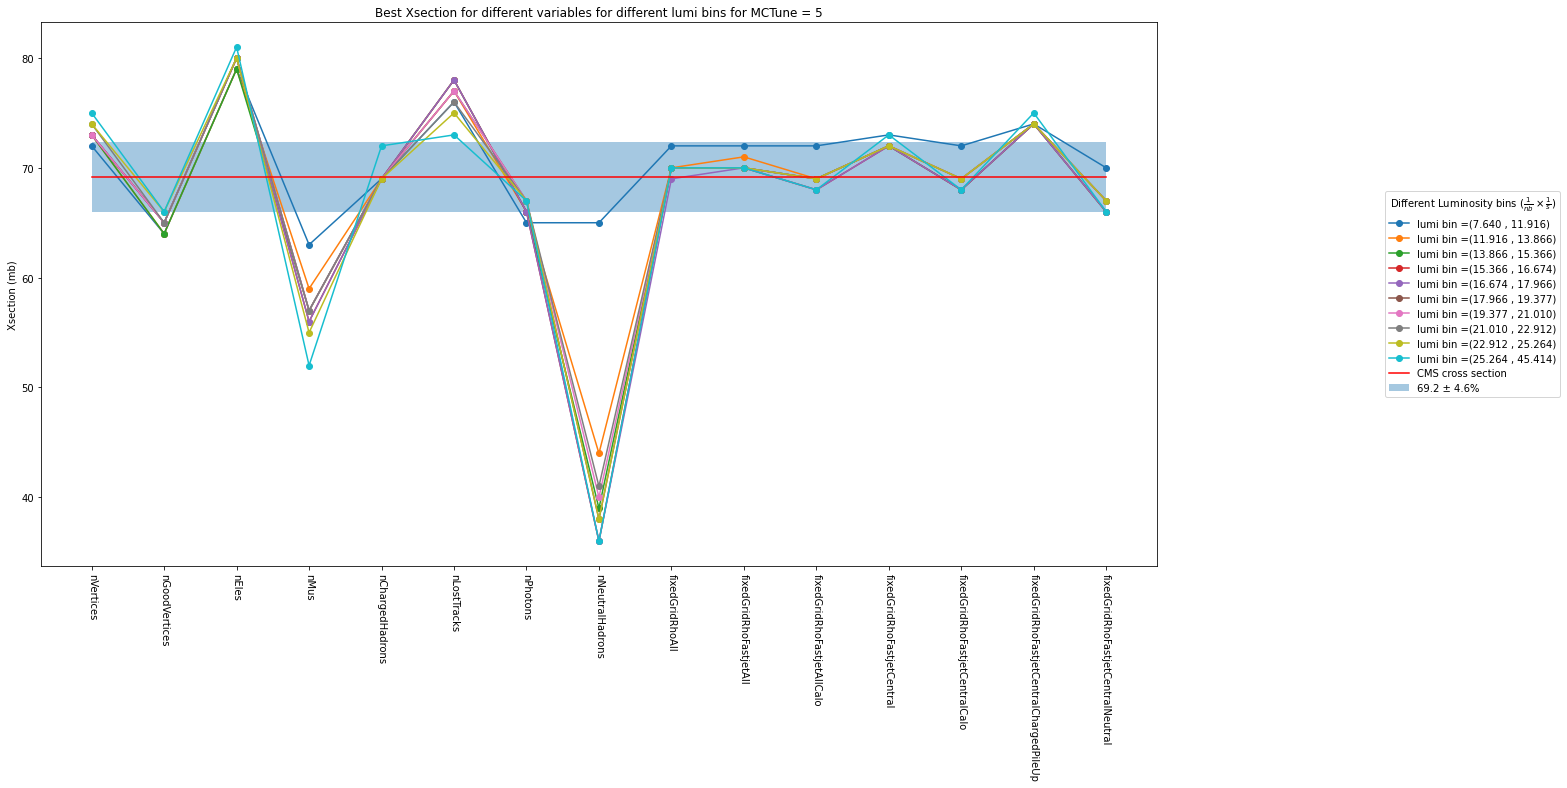

In [32]:
#total plots export
fig1 = go.Figure()
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt_1 = plt.figure(figsize=(20, 10))

XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
key = 'nVertices'
for i in range(vvv[key].nLumiBins):
    if i == 0: 
        pass
    else:
        
        lh = vvv[key].lumi_hists[i]
        theName = 'lumi bin =({0:.3f} , {1:.3f})'.format(lh.min*40 , lh.max*40)
        for key in vvv:
            keys.append(vvv[key].vname)
            values.append(vvv[key].fitResults[i].bestFit)

        XsecBest= {}
        for q in range(len(keys)):
            XsecBest[keys[q]] = values[q]

    #     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
    #     print('------------------------------------')




        names = list(XsecBest.keys())
        values = list(XsecBest.values())



        plt.plot(names , values ,'o-' , label='lumi bin =({0:.3f} , {1:.3f})'.format(lh.min*40 , lh.max*40))
        plt.xticks(rotation=270)

        

        y_est = 69.2 #cross section
        y_err = 69.2*.046 #cross section error

        plt.plot(y_est, 'r-')

        keys = []
        values = []
cross = 69.2
Cross = np.full((len(names)), cross)
plt.ylabel("Xsection (mb)")
plt.title("Best Xsection for different variables for different lumi bins for MCTune = 5")
plt.plot(names,Cross , 'r-' , label = 'CMS cross section')
plt.fill_between(names,y_est - y_err, y_est + y_err, alpha=0.4 , label = u'69.2 \u00B1 4.6%' )
plt.legend(title=r'Different Luminosity bins ($\frac{1}{nb}\times \frac{1}{s}$)',loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.savefig('{0}/{1}/CrossBestVar.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file




## Nima Cross Section! <a name='bookmark5' />

In [349]:
def CrossBest(vvv , variable , first):



    cmscs = 69.2

    X = []
    for i in range(vvv[variable].nLumiBins):

        lh = vvv[variable].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
        X.append(theName)
    y = [cmscs]* len(X)
    y_upper = [cmscs + cmscs*4.6/100]*len(X)
    y_lower = [cmscs - cmscs*4.6/100]*len(X)

    fig1 = go.Figure([
        go.Scatter(
            x=X,
            y=y,
            name = 'CMS Cross Section = 69.2 (mb)',
            line=dict(color='rgb(0,100,80)'),
            mode='lines'
        ),
        go.Scatter(
            x=X+X[::-1], # x, then x reversed
            y=y_upper+y_lower[::-1], # upper, then lower reversed
            fill='toself',
            fillcolor='rgba(0,100,80,0.5)',
            name = r'$69.2 \pm 4.6\%$',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
        )
    ])


    Cross = []
    for i in range(vvv[variable].nLumiBins):

        lh = vvv[variable].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
#         X.append(theName)
        cross = vvv[variable].fitResults[i].bestFit
        Cross.append(cross)
        color = generate_color()


    if first:
        fig1.add_scatter(x = X, y = Cross , name = variable,line=dict(color=color))
    else:
        fig1.add_scatter(x = X[1:], y = Cross[1:] , name = variable,line=dict(color=color))


    fig1.update_layout(
#             template = custom_template,
            title="Cross Section Best Fit",
            xaxis_title='Lumi Bins',
            yaxis_title="Cross Section (mb)",
            autosize=False,
            width=1000,
            height=500,
            )

    fig1.layout.template = 'plotly_white'
    export_Graph(fig1, 'Nima Cross Section Best Fit for {0} ({1})'.format(variable , first), '{0}/{1}/'.format(parent_dir,directory))
    return fig1


In [350]:
CrossBest(vvv , 'nVertices' , first = False)

In [351]:
CrossBest(vvv , 'nVertices' , first = True)

In [374]:
# Define a color generator function

def CrossBestAll(vvv , first):


    variable1 = 'nVertices'

    cmscs = 69.2

    X = []
    for i in range(vvv[variable1].nLumiBins):

        lh = vvv[variable1].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
        X.append(theName)
    y = [cmscs]* len(X)
    y_upper = [cmscs + cmscs*4.6/100]*len(X)
    y_lower = [cmscs - cmscs*4.6/100]*len(X)

    fig1 = go.Figure([
        go.Scatter(
            x=X,
            y=y,
            name = 'CMS Cross Section = 69.2 (mb)',
            line=dict(color='rgb(0,100,80)'),
            mode='lines'
        ),
        go.Scatter(
            x=X+X[::-1], # x, then x reversed
            y=y_upper+y_lower[::-1], # upper, then lower reversed
            fill='toself',
            fillcolor='rgba(0,100,80,0.5)',
            name = r'$69.2 \pm 4.6\%$',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
        )
    ])






  


    for variable in vvv:
    #     X = []
        Cross = []
        for i in range(vvv[variable].nLumiBins):

            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
    #         X.append(theName)
            cross = vvv[variable].fitResults[i].bestFit
            Cross.append(cross)
            color = generate_color()



        if first:
            fig1.add_scatter(x = X, y = Cross , name = variable,line=dict(color=color))
        else:
            fig1.add_scatter(x = X[1:], y = Cross[1:] , name = variable,line=dict(color=color))



    fig1.update_layout(
            title="Cross Section Best Fit",
            xaxis_title='Lumi Bins',
            yaxis_title="Cross Section (mb)",
            plot_bgcolor='white',
            width=1000,
            height=500,
            )
    fig1.update_xaxes(gridcolor='lightgrey')
    fig1.update_yaxes(gridcolor='lightgrey')
#     fig1.layout.template = 'plotly_white'
    export_Graph(fig1, 'Nima Cross Section Best Fit for All Lumi Bins - ({0})'.format(first), '{0}/{1}/'.format(parent_dir,directory))
    return fig1



In [375]:
CrossBestAll(vvv , first = True)

In [376]:
CrossBestAll(vvv , first = False)


## Post Fit tot  <a name = 'bookmark4' />

In [388]:


def NimaPost(vvv , variable):
    fig = go.Figure()

    # variable = 'nVertices'
    for i in range(vvv[variable].nLumiBins):
        bin_Representative = vvv[variable].data_hists[i].binRepresentatives
        lh = vvv[variable].lumi_hists[i]
        norm = vvv[variable].data_hists[i].integral()
        data_list=vvv[variable].data_hists[i].allProbs()
        print(i)
        pre_list = vvv[variable].predictions[i].allProbs(param=vvv[variable].fitResults[i].bestFit)
        pre_list_norm = norm *pre_list
        color = generate_color()
        fig.add_scatter(x=bin_Representative, y=data_list ,name='data for Lumi Bin: ({0:.3f} , {1:.3f})'.format(lh.min*40 , lh.max*40) , mode = 'lines+markers' , line=dict(color=color))
        fig.add_trace(go.Scatter(x=bin_Representative , y = pre_list_norm  , name = 'prediction for Lumi Bin: ({0:.3f} , {1:.3f}) & XS best fit={2}'.format(lh.min*40 , lh.max*40 , vvv[variable].fitResults[i].bestFit)  ,mode='lines' ,line=dict(color=color , shape='spline')))









    fig.update_layout(
            template = custom_template,
            title=" Post Fit: Data Vs. Prediction",
            xaxis_title=variable,
            yaxis_title="data (simulation)",
            legend_title="Luminosity bins (1/nb 1/s)",
            autosize=False,
            width=1000,
            height=600,
            )

    
    export_Graph(fig, 'Post Fit - Tot ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig


In [390]:
vvv['nVertices'].predictions[0].allProbs(param=vvv[variable].fitResults[0].bestFit)

IndexError: list index out of range

In [389]:
NimaPost(vvv , 'nVertices')

0


IndexError: list index out of range

In [384]:
NimaPost(vvv , 'nChargedHadrons')

## Pull and Fit Quality :

### Hamed Pull and Fit Quality   <a name='bookmark1' />


In [42]:
def HamedPull(variable):
    fig = vvv[variable].pullPlots()
    export_Graph(fig, 'Hamed Pull Plot({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig

In [43]:
HamedPull('nVertices')

In [44]:
HamedPull('nChargedHadrons')

['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral']
[9.22415579938749, 6.409664954956795, 0.10024635400162968, 0.8463175435216894, 5.2170840506085305, 1.4992855803451732, 4.2761833144359676, 4.152258877790345, 5.221924240294833, 5.248569070710503, 3.3642304052613685, 5.78653072103273, 2.6271501926492493, 3.9377331650365917, 1.4835157828540304]


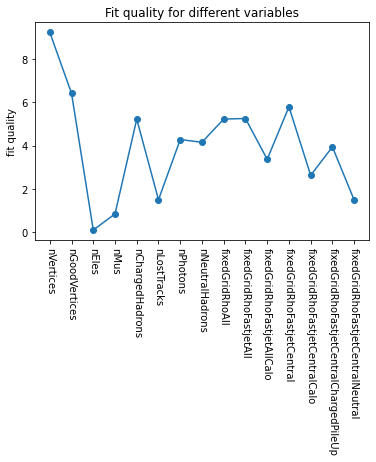

In [45]:
maxtoshow=25
smoothing=1.3
Fit = []
Variables = []
for variable in vvv:
    Variables.append(variable)
    fit = 0
    for i in range(vvv[variable].nLumiBins):

        theName = "Lumi bin = {0}".format(i+1)

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
        fit += (sum(y)/math.sqrt(norm))
    Fit.append(fit)
print(Variables)
print(Fit)



plt.plot(Variables , Fit ,'o-' , label='fit quality')
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

plt.savefig('{0}/{1}/FitQualityHamed.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# plt.savefig('{0}/{1}/FitQuality.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

plt.show()

### Fit for each Lumi bin

In [46]:
maxtoshow=25
smoothing=1.3
fig = go.Figure()
for i in range(vvv[variable].nLumiBins):
    lh = vvv[variable].lumi_hists[i]
    theName = "Lumi bin = ({0:.3f} , {1:.3f})".format(lh.min*40 , lh.max*40)
    Fit = []
    Variables = []
    for variable in vvv:
        Variables.append(variable)
        fit = 0
#     for i in range(vvv[variable].nLumiBins):

        

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
#         fit += (sum(y)/math.sqrt(norm))
        fit += (sum(y)/len(x))
        Fit.append(fit)
    fig.add_trace(go.Scatter(x=Variables , y=Fit ,name=theName) )
#     plt.plot(Variables , Fit ,'o-' , label='{0}'.format(theName))
# print(Variables)
# print(Fit)

fig.update_layout(
        title="Fit quality for different variables",
#         xaxis_title=vvv[variable]._vname,
        yaxis_title="fit quality",
        legend_title="Fit quality for different luminosity bins"
        )
fig.update_xaxes(tickangle=90)

fig.show()

    
# plt.xticks(rotation=270)

# # plt.xlabel("Variable")
# plt.ylabel("fit quality")
# plt.title("Fit quality for different variables")

# plt.legend(bbox_to_anchor=(1.04, 0.5),loc='center left' , title = 'Fit quality for different luminosity bins ')
# plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# plt.show()

## Nadjieh Pull and Fit quality <a name='bookmark6' />

In [47]:
def NadPull(variable):
    fig = vvv[variable].NadjiehPullPlots()
    export_Graph(fig, 'Nad Pull Plot ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig

In [48]:
NadPull('nVertices')

### why diff so big in tail of pull plot?

In [49]:
# dh = vvv[variable].data_hists[1]
# norm = dh.integral()
# x = []
# Data = []
# Pred = []
# Diff = []

# fit = 0
# for b in dh.binRepresentatives:

#     x.append(b)
#     data = float(dh.p(b))
#     pdata = data/norm
#     Data.append(data)
# #     print(pdata)
#     pred = norm*float(vvv[variable].predictions[1].p(
#                  param = vvv[variable].fitResults[1].bestFit , val = b))
#     Pred.append(pred)
#     if pred == 0:
#         diff = 0
#     else:
#         diff = (data - pred)/math.sqrt(pred)
# #     if data == 0:
# #         diff =(data - pred)
# #     else:
# #         diff = (data - pred)/math.sqrt(data)
#     Diff.append(diff)
# for i in range(len(Data)):
#     if Diff[i] > 1000:
#         print(Data[i] , Pred[i] , Diff[i])

['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral']
[5.68396916994963, 3.998486707745933, 11.078029229259583, 0.153369089352701, 2.148788056423641, 0.39332730218297496, 1.044012161938743, 1.0463252191456978, 1.046506901078647, 1.0054974456846588, 0.6338479653232681, 1.4114515123314313, 0.5284773877863865, 0.963501711930774, 0.33719264930989384]


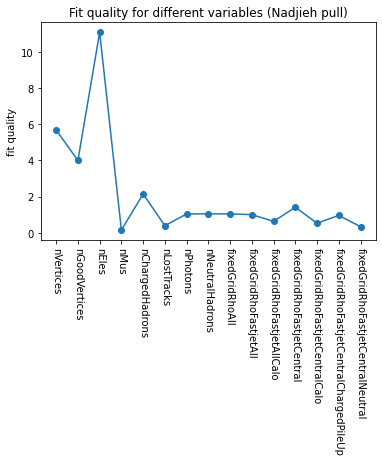

In [50]:
maxtoshow=25
smoothing=1.3
Fit = []
Variables = []
for variable in vvv:
    Variables.append(variable)
    fit = 0
    for i in range(vvv[variable].nLumiBins):

        lh = vvv[variable].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            d= float( dh.p(b) )
            pdf_cent =float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
            pdf_plus = float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit+vvv[variable].fitResults[i].bestFitError , val=b) ) - pdf_cent
            pdf_minus = float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit-vvv[variable].fitResults[i].bestFitError , val=b) ) - pdf_cent
            
            pred = norm*pdf_cent
            pred_err = (abs(pdf_plus)+abs(pdf_minus))/2
    
    

    
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
#                 yval = np.absolute(data-pred)/math.sqrt(pred)
                fEsq = pred * pdf_cent
                sEsq = norm * norm * pred_err * pred_err
                if fEsq+sEsq != 0:
                        yval = (d-pred)/math.sqrt(fEsq+sEsq) 
                else:
                    yval = 0

            y.append(min(yval , maxtoshow) )

            
            
#         print(norm)
#         print(sum(y))
        fit += (abs(sum(y))/math.sqrt(norm))
    Fit.append(fit)
print(Variables)
print(Fit)



plt.plot(Variables , Fit ,'o-' , label='fit quality')
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables (Nadjieh pull)")

plt.savefig('{0}/{1}/FitQualityNad.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# plt.savefig('{0}/{1}/FitQualityNad.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

plt.show()

###  Integral for all variable in all Bins:


In [51]:
# for x in vvv['nVertices'].lumi_hists:
#     print('lumi bin = {0:.3f} - {1:.3f}'.format(x.min , x.max))


In [52]:
for i in range(vvv['nVertices'].nLumiBins):
    for key in vvv:
        dh = vvv[key].data_hists[i]
        norm = int(dh.integral())
#         print('in LumiBin = {0} integral of varible data: {1} is: {2}'.format(i+1 , key , norm))

## Nima pull plot <a name='bookmark7' />

In [53]:
for variable in vvv:
    print(variable)

nVertices
nGoodVertices
nEles
nMus
nChargedHadrons
nLostTracks
nPhotons
nNeutralHadrons
fixedGridRhoAll
fixedGridRhoFastjetAll
fixedGridRhoFastjetAllCalo
fixedGridRhoFastjetCentral
fixedGridRhoFastjetCentralCalo
fixedGridRhoFastjetCentralChargedPileUp
fixedGridRhoFastjetCentralNeutral


In [428]:
def NimaPull(vvv , variable, first):

    fig = go.Figure()
    # variable = 'nVertices'
    Fit = []
    for i in range(vvv[variable].nLumiBins):
        lh = vvv[variable].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
        dh = vvv[variable].data_hists[i]
        norm = dh.integral()
        x = []
        Data = []
        Pred = []
        Diff = []

        fit = 0
        for b in dh.binRepresentatives:

            x.append(b)
            data = float(dh.p(b))
            pdata = data/norm
            Data.append(data)
        #     print(pdata)
            pred = norm*float(vvv[variable].predictions[i].p(
                         param = vvv[variable].fitResults[i].bestFit , val = b))
            Pred.append(pred)
            if data == 0:
                diff =(data - pred)
            else:
                diff = (data - pred)/math.sqrt(data)
            Diff.append(diff)
    #         print(Diff)
        for d in Diff:
            fit += abs(d)
    #         print(fit)
        print('Average diff for {0}= {1}'.format(theName , fit/len(x)))
    #         print('-------------------')
        Fit.append(fit/len(x))
        if first:
            fig.add_trace(go.Scatter(x=x[:] , y=Diff[:] ,name=theName ,mode='lines' , line=dict(shape='spline', smoothing=smoothing)) )
        else:
            fig.add_trace(go.Scatter(x=x[1:] , y=Diff[1:] ,name=theName ,mode='lines' , line=dict(shape='spline', smoothing=smoothing)) )
    # print(Fit)
#     fig.add_shape(type='line',
# #                 x0=0,
#                 y0=0,
                
# #                 y1=0,
#                 line=dict(color='Black',),
#                 xref='x',
#                 yref='y' ,
#                 name = "Data = Prediction")

    fig.update_layout(
            template = custom_template,
            title="Nima Pull plot for {0}".format(vvv[variable]._vname),
            xaxis_title=vvv[variable]._vname,
            yaxis_title="data - simulation",
            legend_title="Luminosity bins (1/nb 1/s)",
            width = 1000,
            height = 500
            )
    export_Graph(fig, 'Nima Pull for {0} ({1})'.format(variable,first), '{0}/{1}/'.format(parent_dir,directory))
    return fig


In [429]:
NimaPull(vvv, 'nVertices' , first=False)

IndexError: list index out of range

In [430]:
NimaPull(vvv, 'nChargedHadrons' , first=False)

Average diff for Lumi bin = (-0.168 , 7.640) = 5.15182209681785
Average diff for Lumi bin = (7.640 , 11.916) = 10.690698396877288
Average diff for Lumi bin = (11.916 , 13.866) = 12.373738618981516
Average diff for Lumi bin = (13.866 , 15.366) = 12.67579005088617
Average diff for Lumi bin = (15.366 , 16.674) = 12.459408838356614
Average diff for Lumi bin = (16.674 , 17.966) = 12.281817365195737
Average diff for Lumi bin = (17.966 , 19.377) = 11.349439967750264
Average diff for Lumi bin = (19.377 , 21.010) = 10.590512790797824
Average diff for Lumi bin = (21.010 , 22.912) = 8.276259566611044
Average diff for Lumi bin = (22.912 , 25.264) = 5.9774848977515305
Average diff for Lumi bin = (25.264 , 45.414) = 9.608992481350693


In [431]:
NimaPull(vvv, 'nVertices' , first=True)

IndexError: list index out of range

In [432]:
NimaPull(vvv, 'nChargedHadrons' , first=True)

Average diff for Lumi bin = (-0.168 , 7.640) = 5.15182209681785
Average diff for Lumi bin = (7.640 , 11.916) = 10.690698396877288
Average diff for Lumi bin = (11.916 , 13.866) = 12.373738618981516
Average diff for Lumi bin = (13.866 , 15.366) = 12.67579005088617
Average diff for Lumi bin = (15.366 , 16.674) = 12.459408838356614
Average diff for Lumi bin = (16.674 , 17.966) = 12.281817365195737
Average diff for Lumi bin = (17.966 , 19.377) = 11.349439967750264
Average diff for Lumi bin = (19.377 , 21.010) = 10.590512790797824
Average diff for Lumi bin = (21.010 , 22.912) = 8.276259566611044
Average diff for Lumi bin = (22.912 , 25.264) = 5.9774848977515305
Average diff for Lumi bin = (25.264 , 45.414) = 9.608992481350693


### Nima Average Fit Quality

In [452]:


def AveFit (vvv, variable):

    fig3 = go.Figure()
#     variable = 'nVertices'

    Fit_ = []
    Fit = []
    SDFit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
    #         for b in bin_rep_final:
            for b in bin_rep:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =0
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            for d in range(len(Data)):
                fit += abs(Diff[d])
            Nfit = fit/len(x)

            Fit.append(Nfit)

            color = generate_color()




    ## Fit Quality
    fig3.add_scatter(x = X, y = Fit , name = 'Average Fit for {0}'.format(variable))
#     fig3.add_scatter(x = X, y = Fit_ , name = 'Average Fit for {0}'.format(variable))
#     fig3.add_scatter(x = X, y = SDFit , name = 'SD Fit for {0}'.format(variable))

#     print(Fit)




    


    fig3.update_layout(
            title="Nima Average Fit Quality for {0}".format(variable),
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            width=750,
            height=450,
            )
    fig3.update_xaxes(gridcolor='lightgrey')
    fig3.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig3, 'Nima Average Fit Quality ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig3 




In [453]:
AveFit(vvv , 'nVertices')

IndexError: list index out of range

In [454]:
AveFit(vvv , 'nChargedHadrons')

In [461]:


def AveFitAll (vvv):
    fig1 = go.Figure()
    for variable in vvv:

        Fit = []
        X = []
        for i in range(vvv[variable].nLumiBins):
                norm = vvv[variable].data_hists[i].integral()
    #         if i ==0:
    #             pass
    #         else:
                lh = vvv[variable].lumi_hists[i]
                theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
                X.append(theName)

                dh = vvv[variable].data_hists[i]
                mean = vvv[variable].data_hists[i].mean()
                std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
                bin_rep = vvv[variable].data_hists[i].binRepresentatives
                bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
            #     print(bin_rep_final)





                Data = []
                Pred = []
                x = []
                for b in bin_rep:
                    x.append(b)
                    data = float(dh.p(b))
                    Data.append(data)
                    pred = norm*float(vvv[variable].predictions[i].p(
                                     param = vvv[variable].fitResults[i].bestFit , val = b))
                    Pred.append(pred)
                Diff = []
                for j in range(len(Data)):
                    if Data[j] == 0:
                        diff= Data[j] - Pred[j]
                    else:
                        diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                    Diff.append(diff) 

                fit = 0
                for d in range(len(Diff)):
                    fit += abs(Diff[d])
                Nfit = fit/len(Diff)

                Fit.append(Nfit)




                color = generate_color()



        fig1.add_scatter(x = X, y = Fit , name = variable,line=dict(color=color))

    #     print('list of Nfit for variable {0} is {1}'.format(variable , Fit))
    #     print('-------------')
    fig1.update_layout(
            title="Nima Average Fit Quality",
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            legend_title="Variables",
            width=1000,
            height=600,
            )
    fig1.update_xaxes(gridcolor='lightgrey')
    fig1.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig1, 'Nima Average Fit Quality (all-var)', '{0}/{1}/'.format(parent_dir,directory))
    return fig1 
#     




In [463]:
AveFitAll(vvv)

## New Method for Pull plot and Fit quality! Around the max of the pull plot <a name='bookmark2' />

### what is the problem of this pull plot?
### for lumi 1: in first the diff is large and in the tail is very good so the average is good.
### lumi 1 events are much less
### not what we want!

### new way of pull plot. sigma near pick

In [469]:
fig = go.Figure()
# plt_1 = plt.figure(figsize=(20, 10))
variable = 'nVertices'
i = 2
bin_Representative = vvv[variable].data_hists[i].binRepresentatives
lh = vvv[variable].lumi_hists[i]
norm = vvv[variable].data_hists[i].integral()
data_list=vvv[variable].data_hists[i].allProbs()
pre_list = vvv[variable].predictions[i].allProbs(param=vvv[variable].fitResults[i].bestFit)
pre_list_norm = norm *pre_list

theName1 = 'data'
theName2 = 'pred'
fig.add_trace(go.Scatter(x=bin_Representative , y = pre_list_norm , name = theName2  ,mode='lines' , line=dict(shape='spline', smoothing=smoothing)))
fig.add_trace(go.Scatter(x=bin_Representative ,y =data_list  , name = theName1))




fig.update_layout(
        title="Post Fit: Data Vs. Prediction",
        xaxis_title=variable,
        yaxis_title="data (simulation)",
        )
fig.data[1].mode = 'lines+markers'

fig.show()






IndexError: list index out of range

In [470]:
fig = go.Figure()
import statistics
mean = vvv['nVertices'].data_hists[i].mean()
print(mean)
std = statistics.stdev(vvv['nVertices'].data_hists[i].binRepresentatives[:int(mean*2)])
print(std)
bin_rep = vvv['nVertices'].data_hists[i].binRepresentatives
bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
# bin_rep_final
Data = []
Pred = []
x = []
dh = vvv['nVertices'].data_hists[i]
for b in bin_rep_final:
    x.append(b)
    data = float(dh.p(b))
    Data.append(data)
norm = sum(Data)
for b in bin_rep_final:
    pred = norm*float(vvv['nVertices'].predictions[i].p(
                     param = vvv['nVertices'].fitResults[i].bestFit , val = b))
    Pred.append(pred)
    
    
theName1 = 'data'
theName2 = 'pred'
fig.add_scatter(x=bin_rep_final, y=Data, name=theName1)
fig.add_trace(go.Scatter(x=bin_rep_final , y = Pred , name = theName2  ,mode='lines' , line=dict(shape='spline', smoothing=smoothing)))
# fig.add_trace(go.Scatter(x=bin_rep_final ,y =Data  , name = theName1))


print(bin_rep_final)
fig.update_layout(
        title="Data Vs. Prediction fot just near the Pick",
        xaxis_title=variable,
        yaxis_title="data (simulation)",
        )
fig.data[0].mode = 'lines+markers'

fig.show()

550.3636285689423
723.1297716638879
[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 145.0, 155.0, 165.0, 175.0, 185.0, 195.0, 205.0, 215.0, 225.0, 235.0, 245.0, 255.0, 265.0, 275.0, 285.0, 295.0, 305.0, 315.0, 325.0, 335.0, 345.0, 355.0, 365.0, 375.0, 385.0, 395.0, 405.0, 415.0, 425.0, 435.0, 445.0, 455.0, 465.0, 475.0, 485.0, 495.0, 505.0, 515.0, 525.0, 535.0, 545.0, 555.0, 565.0, 575.0, 585.0, 595.0, 605.0, 615.0, 625.0, 635.0, 645.0, 655.0, 665.0, 675.0, 685.0, 695.0, 705.0, 715.0, 725.0, 735.0, 745.0, 755.0, 765.0, 775.0, 785.0, 795.0, 805.0, 815.0, 825.0, 835.0, 845.0, 855.0, 865.0, 875.0, 885.0, 895.0, 905.0, 915.0, 925.0, 935.0, 945.0, 955.0, 965.0, 975.0, 985.0, 995.0, 1005.0, 1015.0, 1025.0, 1035.0, 1045.0, 1055.0, 1065.0, 1075.0, 1085.0, 1095.0, 1105.0, 1115.0, 1125.0, 1135.0, 1145.0, 1155.0, 1165.0, 1175.0, 1185.0, 1195.0, 1205.0, 1215.0, 1225.0, 1235.0, 1245.0, 1255.0, 1265.0, 1275.0, 1285.0, 1295.0, 1305.0, 1315.0, 1325.0, 1335.0, 13

In [66]:
# Diff = []
# for i in range(len(Data)):
#     diff = (Data[i] - Pred[i])/math.sqrt(Data[i])
#     Diff.append(diff)
#     #         print(Diff)
# fit = 0
# for d in Diff:
#     fit += abs(d)
# fit/len(Data)

## Summary:SD plots for fixed bin_representatives: <a name='bookmark3' />

### just for one variable, loop on every bins:

In [67]:
for variable in vvv:
    print(variable)

nVertices
nGoodVertices
nEles
nMus
nChargedHadrons
nLostTracks
nPhotons
nNeutralHadrons
fixedGridRhoAll
fixedGridRhoFastjetAll
fixedGridRhoFastjetAllCalo
fixedGridRhoFastjetCentral
fixedGridRhoFastjetCentralCalo
fixedGridRhoFastjetCentralChargedPileUp
fixedGridRhoFastjetCentralNeutral


In [478]:

# variable = 'nVertices'



def SDPost (vvv , variable):
    fig1 = go.Figure()
    # fig2 = go.Figure()
    # fig3 = go.Figure()

    Fit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
            for b in bin_rep_final:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
            for b in bin_rep_final:
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =Data[j] - Pred[j]
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            for d in Diff:
                fit += abs(d)
            Nfit = fit/len(Data)
            Fit.append(Nfit)



            theName1 = 'data for {0} '.format(theName)
            theName2 = 'pred for {0}'.format(theName)
            color = generate_color()



            ## post fit:

            fig1.add_scatter(x=bin_rep_final, y=Data, name=theName1 , mode = 'lines+markers' , line=dict(color=color))
            fig1.add_trace(go.Scatter(x=bin_rep_final , y = Pred , name = theName2  ,mode='lines' ,line=dict(color=color , shape='spline', smoothing=smoothing)))


    fig1.update_layout(
            template = custom_template,
            title="Nima SD Post Fit: Data Vs. Prediction",
            xaxis_title=variable,
            yaxis_title="data (simulation)",
            legend_title="Luminosity bins (1/nb 1/s)",
            width = 1000,
            height = 500
            )

    
    export_Graph(fig1, 'Nima SD Post Fit ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig1


In [479]:
SDPost(vvv , 'nVertices')

IndexError: list index out of range

In [480]:
SDPost(vvv , 'nChargedHadrons')

In [481]:


def SDPull (vvv , variable,first):
    fig2 = go.Figure()

    Fit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
            for b in bin_rep_final:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
            for b in bin_rep_final:
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =Data[j] - Pred[j]
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            for d in Diff:
                fit += abs(d)
            Nfit = fit/len(Data)
            Fit.append(Nfit)



            theName1 = 'data for {0} '.format(theName)
            theName2 = 'pred for {0}'.format(theName)
            color = generate_color()

            
            
            if first:
            
                fig2.add_scatter(x=bin_rep_final[:], y=Diff[:], name=theName , mode = 'lines' , line=dict(color=color))
            else: 
                fig2.add_scatter(x=bin_rep_final[1:], y=Diff[1:], name=theName , mode = 'lines' , line=dict(color=color))





    fig2.update_layout(
            template = custom_template,
            title="Nima SD Pull plot",
            xaxis_title=variable,
            yaxis_title="data -simulation",
            legend_title="Luminosity bins (1/nb 1/s)",
            width = 1000,
            height = 500
            )


    export_Graph(fig2, 'Nima SD Pull Plot ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig2


In [482]:
SDPull (vvv , 'nVertices',first=False)

IndexError: list index out of range

In [483]:
SDPull (vvv , 'nChargedHadrons',first=False)

In [487]:


def SDFit(vvv , variable):
    fig3 = go.Figure()
    Fit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
            for b in bin_rep_final:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
            for b in bin_rep_final:
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =Data[j] - Pred[j]
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            for d in Diff:
                fit += abs(d)
            Nfit = fit/len(Data)
            Fit.append(Nfit)



            theName1 = 'data for {0} '.format(theName)
            theName2 = 'pred for {0}'.format(theName)
            color = generate_color()


    fig3.add_scatter(x = X, y = Fit , name = variable ,line=dict(color=color))



    fig3.update_layout(
            title="Nima SD Fit Quality for {0}".format(variable),
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            width=750,
            height=500,
            )
    fig3.update_xaxes(gridcolor='lightgrey')
    fig3.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig3, 'Nima SD Fit Quality ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))

    return fig3  



In [488]:
SDFit(vvv , 'nVertices')

IndexError: list index out of range

In [489]:
SDFit(vvv , 'nChargedHadrons')

## Fit Quality for all Variables:

In [496]:


def SDFitAll (vvv):

    fig1 = go.Figure()

    for variable in vvv:
#         if variable == 'nVertices':
#             pass
#         else:
            SDFit = []
            X = []
            for i in range(vvv[variable].nLumiBins):
                    norm = vvv[variable].data_hists[i].integral()
        #         if i ==0:
        #             pass
        #         else:
                    lh = vvv[variable].lumi_hists[i]
                    theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
                    X.append(theName)

                    dh = vvv[variable].data_hists[i]
                    mean = vvv[variable].data_hists[i].mean()
                    std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
                    bin_rep = vvv[variable].data_hists[i].binRepresentatives
                    bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
                #     print(bin_rep_final)





                    Data = []
                    Pred = []
                    x = []
                    for b in bin_rep_final:
                        x.append(b)
                        data = float(dh.p(b))
                        Data.append(data)
        #             norm = sum(Data)
                    for b in bin_rep_final:
                        pred = norm*float(vvv[variable].predictions[i].p(
                                         param = vvv[variable].fitResults[i].bestFit , val = b))
                        Pred.append(pred)
                    Diff = []
                    for j in range(len(Data)):
                        if Data[j] == 0:
                            diff= Data[j] - Pred[j]
                        else:
                            diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                        Diff.append(diff) 

                    fit = 0
                    for d in Diff:
                        fit += abs(d)
                    Nfit = fit/len(Data)
                    SDFit.append(Nfit)



                    theName1 = 'data for {0} '.format(theName)
                    theName2 = 'pred for {0}'.format(theName)
                    color = generate_color()



            fig1.add_scatter(x = X, y = SDFit , name = variable,line=dict(color=color))

    #     print('list of Nfit for variable {0} is {1}'.format(variable , Fit))
    #     print('-------------')
    fig1.update_layout(
            title="Nima SD Fit Quality",
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            legend_title="Variables",
            width=1000,
            height=600,
            )
    fig1.update_xaxes(gridcolor='lightgrey')
    fig1.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig1, 'Nima SD Fit Quality (all-var)', '{0}/{1}/'.format(parent_dir,directory))

    return fig1




In [497]:
SDFitAll(vvv)

IndexError: list index out of range

## Weighted Fit Quality: <a name='bookmark9' />

In [76]:
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
variable = 'nVertices'
import statistics

import random

# Define a color generator function
def generate_color():
    color = '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color


Fit_ = []
Fit = []
SDFit = []
X = []
for i in range(vvv[variable].nLumiBins):
        norm = vvv[variable].data_hists[i].integral()
#     if i ==0: #### first lumi bin is junk
#         pass
#     else:


        lh = vvv[variable].lumi_hists[i]
        theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
        X.append(theName)

        dh = vvv[variable].data_hists[i]
        mean = vvv[variable].data_hists[i].mean()
    #         print(mean)
        std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
        bin_rep = vvv[variable].data_hists[i].binRepresentatives
        bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
    #     print(bin_rep_final)





    
        Data = []
        Pred = []
        x = []
#         for b in bin_rep_final:
        for b in bin_rep:
            x.append(b)
            data = float(dh.p(b))
            Data.append(data)
    #     norm = sum(Data)
            pred = norm*float(vvv[variable].predictions[i].p(
                             param = vvv[variable].fitResults[i].bestFit , val = b))
            Pred.append(pred)
        Diff = []
        for j in range(len(Data)):
            if Data[j] == 0:
                diff =Data[j] - Pred[j]
            else:
                diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
            Diff.append(diff) 

        fit = 0
        fit_ = 0
        for d in range(len(Data)):
            fit += abs(Diff[d])*Data[d]
            fit_ += abs(Diff[d])
        Nfit_ = fit_/len(Data)
#         Nfit = fit/norm
        Nfit = fit/sum(Data)
        
        Fit.append(Nfit)
        Fit_.append(Nfit_)


        theName1 = 'data for {0} '.format(theName)
        theName2 = 'pred for {0}'.format(theName)
        color = generate_color()
        
        
        
        ## post fit:
        
        fig1.add_scatter(x=bin_rep, y=Data, name=theName1 , mode = 'lines+markers' , line=dict(color=color))
        fig1.add_trace(go.Scatter(x=bin_rep , y = Pred , name = theName2  ,mode='lines' ,line=dict(color=color , shape='spline', smoothing=smoothing)))
        # fig.add_trace(go.Scatter(x=bin_rep_final ,y =Data  , name = theName1))
    #     fig.data[0].mode = 'lines+markers'

        ## Pull Plot:
        fig2.add_scatter(x=bin_rep, y=Diff, name=theName , mode = 'lines' , line=dict(color=color))
        
        
    


        Data = []
        Pred = []
        x = []
        for b in bin_rep_final:
            x.append(b)
            data = float(dh.p(b))
            Data.append(data)
            pred = norm*float(vvv[variable].predictions[i].p(
                             param = vvv[variable].fitResults[i].bestFit , val = b))
            Pred.append(pred)
        Diff = []
        for q in range(len(Data)):
            if Data[q] == 0:
                diff= Data[q] - Pred[q]
            else:
                diff = (Data[q] - Pred[q])/math.sqrt(Data[q])
            Diff.append(diff) 

        fit = 0
        for d in Diff:
            fit += abs(d)
        Nfit = fit/len(Data)
        SDFit.append(Nfit)
        
        
        
        
        
        

## Fit Quality
fig3.add_scatter(x = X, y = Fit , name = 'Wighted Fit for {0}'.format(variable))
fig3.add_scatter(x = X, y = Fit_ , name = 'Average Fit for {0}'.format(variable))
fig3.add_scatter(x = X, y = SDFit , name = 'SD Fit for {0}'.format(variable))

print(Fit)
    
fig1.update_layout(
        title="Nima Post Fit: Data Vs. Prediction",
        xaxis_title=variable,
        yaxis_title="data (simulation)",
        )

fig1.show()


fig2.update_layout(
        title="Nima Pull plot",
        xaxis_title=variable,
        yaxis_title="data -simulation",
        )

fig2.show()
    
fig3.update_layout(
        title="Nima Weighted Vs Average Vs. SD Fit Quality for {0}".format(variable),
        xaxis_title='Lumi Bins',
        yaxis_title="Fit Quality",
        )
    
fig3.show()  

export_Graph(fig3, 'Nima Weighted VS. Average Vs. SD Fit Quality', '{0}/{1}/'.format(parent_dir,directory))


[31.710986489966924, 16.206035237963047, 14.558978324036637, 11.899605694577112, 10.672314057804948, 10.41933238501639, 11.03069988387783, 13.431965650384466, 11.182618996968804, 11.55324608773987, 20.64860467031]


In [77]:
for i in range(vvv['nVertices'].nLumiBins):
    dh = vvv['nVertices'].data_hists[i]
    print(dh.integral())

469859.0
4230143.0
4700164.0
4700166.0
4699740.0
4700594.0
4700168.0
4700164.0
4700157.0
4700147.0
4697661.0


In [499]:

def WeightedFit (vvv, variable):

    fig3 = go.Figure()
#     variable = 'nVertices'

    Fit_ = []
    Fit = []
    SDFit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
    #         for b in bin_rep_final:
            for b in bin_rep:
                x.append(b)
                data = int(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =Data[j] - Pred[j]
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            for d in range(len(Data)):
                fit += abs(Diff[d])*Data[d]
#                 print(fit)
#             Nfit = fit/norm
            Nfit = fit/sum(Data)

            Fit.append(Nfit)

            color = generate_color()
#             print(sum(Data))
#             print(norm)
#             print(i)
#             print(Diff)
#             print(Data)

#             print(np.mean(Nfit))

    ## Fit Quality
    fig3.add_scatter(x = X, y = Fit , name = 'Wighted Fit for {0}'.format(variable))



    


    fig3.update_layout(
            title="Nima Weighted Fit Quality for {0}".format(variable),
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            width=750,
            height=500,
            )
    fig3.update_xaxes(gridcolor='lightgrey')
    fig3.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig3, 'Nima Weighted Fit Quality ({0})'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
#     print(x)
#     print(Data)
#     print(Diff)
#     print(Fit)
    return fig3 




In [500]:
WeightedFit(vvv,'nChargedHadrons')

In [79]:
for variable in vvv:
    print(variable)
    WeightedFit(vvv , variable)

nVertices
469859
469859.0
4230143
4230143.0
4700164
4700164.0
4700166
4700166.0
4699740
4699740.0
4700594
4700594.0
4700168
4700168.0
4700164
4700164.0
4700157
4700157.0
4700147
4700147.0
4697661
4697661.0
nGoodVertices
469859
469859.0
4230150
4230150.0
4700167
4700167.0
4700168
4700168.0
4699743
4699743.0
4700597
4700597.0
4700169
4700169.0
4700169
4700169.0
4700167
4700167.0
4700165
4700165.0
4699611
4699611.0
nEles
469859
469859.0
4230151
4230151.0
4700167
4700167.0
4700169
4700169.0
4699743
4699743.0
4700597
4700597.0
4700170
4700170.0
4700170
4700170.0
4700168
4700168.0
4700169
4700169.0
4700169
4700169.0
nMus
469858
469858.0
4230136
4230136.0
4700139
4700139.0
4700094
4700094.0
4699630
4699630.0
4700363
4700363.0
4699743
4699743.0
4699385
4699385.0
4698609
4698609.0
4697367
4697367.0
4693119
4693119.0
nChargedHadrons
469859
4698590.0
4230150
42301500.0
4700167
47001670.0
4700167
47001670.0
4699742
46997420.0
4700597
47005970.0
4700169
47001690.0
4700169
47001690.0
4700168
4700168

In [504]:


def FitComp (vvv, variable):

    fig3 = go.Figure()
#     variable = 'nVertices'

    Fit_ = []
    Fit = []
    SDFit = []
    X = []
    for i in range(vvv[variable].nLumiBins):
            norm = vvv[variable].data_hists[i].integral()
    #     if i ==0: #### first lumi bin is junk
    #         pass
    #     else:


            lh = vvv[variable].lumi_hists[i]
            theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
            X.append(theName)

            dh = vvv[variable].data_hists[i]
            mean = vvv[variable].data_hists[i].mean()
        #         print(mean)
            std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
            bin_rep = vvv[variable].data_hists[i].binRepresentatives
            bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
        #     print(bin_rep_final)





            Data = []
            Pred = []
            x = []
    #         for b in bin_rep_final:
            for b in bin_rep:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
        #     norm = sum(Data)
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for j in range(len(Data)):
                if Data[j] == 0:
                    diff =Data[j] - Pred[j]
                else:
                    diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                Diff.append(diff) 

            fit = 0
            fit_ = 0
            for d in range(len(Data)):
                fit += abs(Diff[d])*Data[d]
                fit_ += abs(Diff[d])
            Nfit_ = fit_/len(Data)
#             Nfit = fit/norm
            Nfit = fit/sum(Data)

            Fit.append(Nfit)
            Fit_.append(Nfit_)


            theName1 = 'data for {0} '.format(theName)
            theName2 = 'pred for {0}'.format(theName)
            color = generate_color()




            Data = []
            Pred = []
            x = []
            for b in bin_rep_final:
                x.append(b)
                data = float(dh.p(b))
                Data.append(data)
                pred = norm*float(vvv[variable].predictions[i].p(
                                 param = vvv[variable].fitResults[i].bestFit , val = b))
                Pred.append(pred)
            Diff = []
            for q in range(len(Data)):
                if Data[q] == 0:
                    diff= 0
                else:
                    diff = (Data[q] - Pred[q])/math.sqrt(Data[q])
                Diff.append(diff) 

            fit = 0
            for d in Diff:
                fit += abs(d)
            Nfit = fit/len(Data)
            SDFit.append(Nfit)




    ## Fit Quality
    fig3.add_scatter(x = X, y = Fit , name = 'Wighted Fit for {0}'.format(variable))
    fig3.add_scatter(x = X, y = Fit_ , name = 'Average Fit for {0}'.format(variable))
    fig3.add_scatter(x = X, y = SDFit , name = 'SD Fit for {0}'.format(variable))

#     print(Fit)




    


    fig3.update_layout(
            title="Nima Weighted Vs Average Vs. SD Fit Quality for {0}".format(variable),
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            width=1000,
            height=500,
            )
    fig3.update_xaxes(gridcolor='lightgrey')
    fig3.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig3, 'Nima Weighted VS. Average Vs. SD Fit Quality for {0}'.format(variable), '{0}/{1}/'.format(parent_dir,directory))
    return fig3 




In [505]:
FitComp(vvv , 'nVertices')

IndexError: list index out of range

In [506]:
FitComp(vvv , 'nChargedHadrons')

## Weighted Fit Quality for all Variables:

In [512]:

def WeightedFitAll (vvv):
    fig1 = go.Figure()
    for variable in vvv:
        if variable == 'nVertices':
            pass
        else:
            
            Fit = []
            X = []
            for i in range(vvv[variable].nLumiBins):
                    norm = vvv[variable].data_hists[i].integral()
        #         if i ==0:
        #             pass
        #         else:
                    lh = vvv[variable].lumi_hists[i]
                    theName = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
                    X.append(theName)

                    dh = vvv[variable].data_hists[i]
                    mean = vvv[variable].data_hists[i].mean()
                    std = statistics.stdev(vvv[variable].data_hists[i].binRepresentatives[:])
                    bin_rep = vvv[variable].data_hists[i].binRepresentatives
                    bin_rep_final = [x for x in bin_rep if (mean - 1.5*std < x < mean + 1.5*std) ]
                #     print(bin_rep_final)





                    Data = []
                    Pred = []
                    x = []
                    for b in bin_rep:
                        x.append(b)
                        data = float(dh.p(b))
                        Data.append(data)
                        pred = norm*float(vvv[variable].predictions[i].p(
                                         param = vvv[variable].fitResults[i].bestFit , val = b))
                        Pred.append(pred)
                    Diff = []
                    for j in range(len(Data)):
                        if Data[j] == 0:
                            diff= Data[j] - Pred[j]
                        else:
                            diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                        Diff.append(diff) 

                    fit = 0
                    for d in range(len(Diff)):
                        fit += abs(Diff[d])*Data[d]
    #                 Nfit = fit/norm
                    Nfit=fit/sum(Data)

                    Fit.append(Nfit)




                    color = generate_color()



            fig1.add_scatter(x = X, y = Fit , name = variable,line=dict(color=color))

    #     print('list of Nfit for variable {0} is {1}'.format(variable , Fit))
    #     print('-------------')
    fig1.update_layout(
            title="Nima Weighted Fit Quality",
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            plot_bgcolor='white',
            legend_title="Variables",
            width=1000,
            height=500,
            )
    fig1.update_xaxes(gridcolor='lightgrey')
    fig1.update_yaxes(gridcolor='lightgrey')
    export_Graph(fig1, 'Nima Weighted Fit Quality (D-all-var)', '{0}/{1}/'.format(parent_dir,directory))
    return fig1 
#     




In [513]:
WeightedFitAll(vvv)

In [134]:
NimaPull(vvv,'nVertices',False)

Average diff for Lumi bin = (-0.168 , 7.640) = 32.107047059149856
Average diff for Lumi bin = (7.640 , 11.916) = 13.455248868122034
Average diff for Lumi bin = (11.916 , 13.866) = 10.101554995089087
Average diff for Lumi bin = (13.866 , 15.366) = 8.689212256513642
Average diff for Lumi bin = (15.366 , 16.674) = 8.02659911239136
Average diff for Lumi bin = (16.674 , 17.966) = 7.345592150242822
Average diff for Lumi bin = (17.966 , 19.377) = 7.909170039185491
Average diff for Lumi bin = (19.377 , 21.010) = 8.616420961233782
Average diff for Lumi bin = (21.010 , 22.912) = 7.947331851419109
Average diff for Lumi bin = (22.912 , 25.264) = 10.230508652080523
Average diff for Lumi bin = (25.264 , 45.414) = 19.275888383370607


In [133]:
NimaPull(vvv,'nChargedHadrons',False)

Average diff for Lumi bin = (-0.168 , 7.640) = 5.15182209681785
Average diff for Lumi bin = (7.640 , 11.916) = 10.690698396877288
Average diff for Lumi bin = (11.916 , 13.866) = 12.373738618981516
Average diff for Lumi bin = (13.866 , 15.366) = 12.67579005088617
Average diff for Lumi bin = (15.366 , 16.674) = 12.459408838356614
Average diff for Lumi bin = (16.674 , 17.966) = 12.281817365195737
Average diff for Lumi bin = (17.966 , 19.377) = 11.349439967750264
Average diff for Lumi bin = (19.377 , 21.010) = 10.590512790797824
Average diff for Lumi bin = (21.010 , 22.912) = 8.276259566611044
Average diff for Lumi bin = (22.912 , 25.264) = 5.9774848977515305
Average diff for Lumi bin = (25.264 , 45.414) = 9.608992481350693


## Check Fit Quality for Different Runs: <a name='bookmark8' />

In [515]:


def WeightedFitRuns(vvv , variable):
    fig1 = go.Figure()

    TheName = []
    # variable = 'nVertices'
    for sr in range(len(vvv[variable]._subRunsSameLumiBins)):
        theName = vvv[variable]._subRunsSameLumiBins[sr].run
        TheName.append(theName)
        Fit = []
        X = []
        for i in range(vvv[variable].nLumiBins):
            if i ==0:
                pass
            else:
                lh = vvv[variable].lumi_hists[i]
                theName1 = "Lumi bin = ({0:.3f} , {1:.3f}) ".format(lh.min*40 , lh.max*40)
                X.append(theName1)
                dh = vvv[variable]._subRunsSameLumiBins[sr].data_hists[i]
                norm = dh.integral()
    #             print('integral for lumi{0} in run{1} is {2}'.format( theName1,theName  , dh.integral()))
                bin_rep = vvv[variable]._subRunsSameLumiBins[sr].data_hists[i].binRepresentatives
                Data = []
                Pred = []
                x = []
                for b in bin_rep:
                    x.append(b)
                    data = float(dh.p(b))
                    Data.append(data)
                    pred = norm*float(vvv[variable].predictions[i].p(
                                     param = vvv[variable].fitResults[i].bestFit , val = b))
                    Pred.append(pred)


                Diff = []
                for j in range(len(Data)):
                    if Data[j] == 0:
                        diff= Data[j] - Pred[j]
                    else:
                        diff = (Data[j] - Pred[j])/math.sqrt(Data[j])
                    Diff.append(diff) 

                fit = 0
                for d in range(len(Diff)):
                    fit += abs(Diff[d])*Data[d]
#                 Nfit = fit/norm
                Nfit = fit/sum(Data)

                Fit.append(Nfit)

                color = generate_color()


        fig1.add_scatter(x = X, y = Fit , name = theName,line=dict(color=color))

    #     print('list of Nfit for variable {0} is {1}'.format(variable , Fit))
    #     print('-------------')
    fig1.update_layout(
            title="Nima Weighted Fit Quality for Different Runs for {0}".format(variable),
            xaxis_title='Lumi Bins',
            yaxis_title="Fit Quality",
            legend_title="Different Runs",
            plot_bgcolor='white',
            width=1000,
            height=600,
            )
    fig1.update_xaxes(gridcolor='lightgrey')
    fig1.update_yaxes(gridcolor='lightgrey')

    
    export_Graph(fig1, 'Nima Weighted Fit Quality ({0}) for Different runs'.format(variable), '{0}/{1}/'.format(parent_dir,directory,variable))
    return fig1   



In [516]:
WeightedFitRuns(vvv , 'nVertices')

IndexError: list index out of range

In [517]:
WeightedFitRuns(vvv , 'nChargedHadrons')

In [130]:
FitComp(vvv,'nChargedHadrons')

In [86]:
for key in vvv:
    print(key)
FitComp(vvv , 'nChargedHadrons')

nVertices
nGoodVertices
nEles
nMus
nChargedHadrons
nLostTracks
nPhotons
nNeutralHadrons
fixedGridRhoAll
fixedGridRhoFastjetAll
fixedGridRhoFastjetAllCalo
fixedGridRhoFastjetCentral
fixedGridRhoFastjetCentralCalo
fixedGridRhoFastjetCentralChargedPileUp
fixedGridRhoFastjetCentralNeutral


# define functions: <a name = 'bookmark14' />

### CrossBest(vvv,variable,first = True)
### CrossBestAll(vvv,variable)
### HamedPull(variable)
### NadPull(variable)
### NimaPost(vvv , variable)
### NimaPull(vvv,variable , first = False)
### AveFit(vvv,variable)
### AveFitAll(vvv)
### SDPost(vvv,variable)
### SDPull(vvv,variable,first=False)
### SDFit(vvv,variable)
### SDFitAll(vvv)
### WeightedFit(vvv,variable)
### WeightedFitAll(vvv)
### WeightedFitRuns(vvv,variable)
### FitComp(vvv,variable)


## Try some:

In [87]:
FitComp(vvv , "nPhotons")

In [88]:
NimaPull(vvv,'nChargedHadrons',False)

Average diff for Lumi bin = (-0.168 , 7.640) = 5.15182209681785
Average diff for Lumi bin = (7.640 , 11.916) = 10.690698396877288
Average diff for Lumi bin = (11.916 , 13.866) = 12.373738618981516
Average diff for Lumi bin = (13.866 , 15.366) = 12.67579005088617
Average diff for Lumi bin = (15.366 , 16.674) = 12.459408838356614
Average diff for Lumi bin = (16.674 , 17.966) = 12.281817365195737
Average diff for Lumi bin = (17.966 , 19.377) = 11.349439967750264
Average diff for Lumi bin = (19.377 , 21.010) = 10.590512790797824
Average diff for Lumi bin = (21.010 , 22.912) = 8.276259566611044
Average diff for Lumi bin = (22.912 , 25.264) = 5.9774848977515305
Average diff for Lumi bin = (25.264 , 45.414) = 9.608992481350693


In [89]:
NimaPull(vvv,'nChargedHadrons',False)

Average diff for Lumi bin = (-0.168 , 7.640) = 5.15182209681785
Average diff for Lumi bin = (7.640 , 11.916) = 10.690698396877288
Average diff for Lumi bin = (11.916 , 13.866) = 12.373738618981516
Average diff for Lumi bin = (13.866 , 15.366) = 12.67579005088617
Average diff for Lumi bin = (15.366 , 16.674) = 12.459408838356614
Average diff for Lumi bin = (16.674 , 17.966) = 12.281817365195737
Average diff for Lumi bin = (17.966 , 19.377) = 11.349439967750264
Average diff for Lumi bin = (19.377 , 21.010) = 10.590512790797824
Average diff for Lumi bin = (21.010 , 22.912) = 8.276259566611044
Average diff for Lumi bin = (22.912 , 25.264) = 5.9774848977515305
Average diff for Lumi bin = (25.264 , 45.414) = 9.608992481350693


In [90]:
WeightedFitAll(vvv)

In [91]:
FitComp(vvv , 'nChargedHadrons')

In [92]:
WeightedFitAll(vvv)

In [93]:
AveFitAll(vvv)

In [94]:
FitComp(vvv , 'nVertices')

## some features of the code: <a name = 'bookmark15' />

In [95]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var: {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var: nVertices in lumi bin = 1 is : 76.0 
best fit for var: nVertices in lumi bin = 2 is : 72.0 
best fit for var: nVertices in lumi bin = 3 is : 73.0 
best fit for var: nVertices in lumi bin = 4 is : 73.0 
best fit for var: nVertices in lumi bin = 5 is : 73.0 
best fit for var: nVertices in lumi bin = 6 is : 73.0 
best fit for var: nVertices in lumi bin = 7 is : 73.0 
best fit for var: nVertices in lumi bin = 8 is : 73.0 
best fit for var: nVertices in lumi bin = 9 is : 74.0 
best fit for var: nVertices in lumi bin = 10 is : 74.0 
best fit for var: nVertices in lumi bin = 11 is : 75.0 
best fit for var: nGoodVertices in lumi bin = 1 is : 66.0 
best fit for var: nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 4 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 5 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 6 is : 65.0 
best fit for var: nGoodVertices in lumi

In [96]:
vvv['nVertices'].subRunNumbers


[315257,
 315264,
 315267,
 315322,
 315357,
 315363,
 315420,
 315489,
 315506,
 315512,
 315555,
 315557,
 315641,
 315644,
 315646,
 315648,
 315690,
 315703,
 315705,
 315721,
 315764,
 315784,
 315786,
 315800,
 315840,
 315974,
 316059,
 316061,
 316082,
 316111,
 316114,
 316186,
 316199,
 316201,
 316216,
 316218,
 316239,
 316241,
 316361,
 316363,
 316378,
 316380,
 316457,
 316470,
 316505,
 316590,
 316615,
 316667,
 316701,
 316715,
 316717,
 316719,
 316721,
 316723,
 316766,
 316877,
 316928,
 316993,
 316995]

In [97]:
for i in  vvv['nVertices']._subRuns:
    x = i.run
    print(x)
print(len(vvv['nVertices']._subRuns))

315641
316061
316111
315257
315786
315974
315784
315555
315506
315648
315363
315267
315264
315644
315764
315557
315703
315721
316082
315800
316059
315705
315489
315690
315357
315840
315322
315512
315420
315646
316186
316378
316363
316715
316361
316721
316723
316719
316241
316216
316667
316201
316239
316717
316470
316928
316701
316615
316993
316590
316877
316218
316199
316380
316995
316114
316505
316457
316766
59


In [98]:
x = vvv['nVertices'].subRunNumbers
print(x)

[315257, 315264, 315267, 315322, 315357, 315363, 315420, 315489, 315506, 315512, 315555, 315557, 315641, 315644, 315646, 315648, 315690, 315703, 315705, 315721, 315764, 315784, 315786, 315800, 315840, 315974, 316059, 316061, 316082, 316111, 316114, 316186, 316199, 316201, 316216, 316218, 316239, 316241, 316361, 316363, 316378, 316380, 316457, 316470, 316505, 316590, 316615, 316667, 316701, 316715, 316717, 316719, 316721, 316723, 316766, 316877, 316928, 316993, 316995]


In [99]:

for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 1 is : 76.0 
best fit for var = nVertices in lumi bin = 2 is : 72.0 
best fit for var = nVertices in lumi bin = 3 is : 73.0 
best fit for var = nVertices in lumi bin = 4 is : 73.0 
best fit for var = nVertices in lumi bin = 5 is : 73.0 
best fit for var = nVertices in lumi bin = 6 is : 73.0 
best fit for var = nVertices in lumi bin = 7 is : 73.0 
best fit for var = nVertices in lumi bin = 8 is : 73.0 
best fit for var = nVertices in lumi bin = 9 is : 74.0 
best fit for var = nVertices in lumi bin = 10 is : 74.0 
best fit for var = nVertices in lumi bin = 11 is : 75.0 
best fit for var = nGoodVertices in lumi bin = 1 is : 66.0 
best fit for var = nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 4 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 5 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 6 is : 65.0 
best fit for var = nGo

In [100]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        if i == 3 - 1:
            print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 3 is : 73.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var = nEles in lumi bin = 3 is : 79.0 
best fit for var = nMus in lumi bin = 3 is : 59.0 
best fit for var = nChargedHadrons in lumi bin = 3 is : 69.0 
best fit for var = nLostTracks in lumi bin = 3 is : 77.0 
best fit for var = nPhotons in lumi bin = 3 is : 66.0 
best fit for var = nNeutralHadrons in lumi bin = 3 is : 44.0 
best fit for var = fixedGridRhoAll in lumi bin = 3 is : 70.0 
best fit for var = fixedGridRhoFastjetAll in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetAllCalo in lumi bin = 3 is : 69.0 
best fit for var = fixedGridRhoFastjetCentral in lumi bin = 3 is : 72.0 
best fit for var = fixedGridRhoFastjetCentralCalo in lumi bin = 3 is : 69.0 
best fit for var = fixedGridRhoFastjetCentralChargedPileUp in lumi bin = 3 is : 74.0 
best fit for var = fixedGridRhoFastjetCentralNeutral in lumi bin = 3 is : 67.0 


In [101]:
import numpy as np
import matplotlib.pyplot as plt


XsecBest = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)

        
        
        
print(keys)
print(values)

15
['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nV

In [102]:
for i in range (vvv['nVertices'].nLumiBins):
    print(vvv['nVertices'].data_hists[i].integral())

469859.0
4230143.0
4700164.0
4700166.0
4699740.0
4700594.0
4700168.0
4700164.0
4700157.0
4700147.0
4697661.0


In [103]:
vvv['nVertices'].data_hists[0].integral()

469859.0

In [104]:
vvv['nVertices'].predictions

In [105]:
vvv['nVertices'].plotPredictions([45])

In [106]:
vvv['nVertices'].predictions[0].plot()

In [107]:
 vvv['nVertices'].predictions[0].plot(param=vvv['nVertices'].fitResults[0].bestFit ,
                                    norm=vvv['nVertices'].data_hists[0].integral()
                                    )

In [108]:
vvv['nVertices'].predictions[0].plot(norm=vvv['nVertices'].data_hists[0].integral() ,param=vvv['nVertices'].fitResults[0].bestFit)


In [109]:

prelist = vvv['nVertices'].predictions[0].allProbs()
print(prelist)
print(sum(prelist))

[3.69131324e-02 1.34150358e-01 1.61759117e-01 1.76084033e-01
 1.61690327e-01 1.27815823e-01 8.86376073e-02 5.46587384e-02
 3.04635352e-02 1.55192469e-02 7.20781226e-03 3.11808495e-03
 1.25175498e-03 4.77826332e-04 1.68350963e-04 5.81463478e-05
 1.82651076e-05 5.54448107e-06 1.66484778e-06 4.68625112e-07
 1.19036033e-07 3.26284576e-08 8.54182644e-09 2.31801122e-09
 4.21183202e-10 1.26063296e-10 2.26636700e-11 2.46428575e-11
 8.39166027e-13 1.48147120e-13 6.75127368e-14 9.98901951e-15
 2.09097793e-15 6.38325783e-16 3.26171424e-17 5.84440882e-17
 1.33632780e-18 1.72571767e-19 2.33688742e-20 1.93189982e-18
 3.72259771e-21 1.31361345e-22 7.06857542e-23 5.34504367e-23
 8.11912174e-24 1.55988892e-23 1.25837284e-24 5.29032300e-27
 9.02546162e-27 7.41408106e-27 2.60067233e-26 4.34463061e-28
 6.50307944e-29 1.12114257e-29 8.61757276e-30 1.05009796e-30
 1.86472915e-30 7.18210694e-30 3.26446029e-32 2.15784106e-33
 1.88326877e-33 1.51069155e-32 2.34367661e-34 9.04069322e-36
 2.87272178e-36 4.478360

In [110]:
vvv['nVertices'].data_hists[0].plot()


In [111]:
datalist =(vvv['nVertices'].data_hists[0].allProbs())/(vvv['nVertices'].data_hists[0].integral())
print(datalist)
print(sum(datalist))

[0.00000000e+00 3.98757925e-02 5.33692023e-02 5.89964223e-02
 6.15567649e-02 6.53685467e-02 6.97443276e-02 7.48458580e-02
 7.87300020e-02 8.13499369e-02 7.87321303e-02 7.25813489e-02
 6.28337437e-02 5.26221696e-02 4.09484547e-02 3.08198843e-02
 2.22002771e-02 1.56195795e-02 1.07266222e-02 7.13192681e-03
 5.02491173e-03 3.53723138e-03 2.64121790e-03 1.81330995e-03
 1.37488055e-03 1.11735648e-03 8.25779649e-04 6.29976227e-04
 5.57614093e-04 5.10791535e-04 3.83093651e-04 4.06504930e-04
 2.85191941e-04 2.49010873e-04 2.46882575e-04 2.76678748e-04
 2.19214701e-04 2.74550450e-04 1.74520441e-04 1.53237461e-04
 1.42595970e-04 1.59622355e-04 1.02158307e-04 1.14928095e-04
 1.19184692e-04 8.93885187e-05 7.02338361e-05 5.32074516e-05
 4.25659613e-05 5.32074516e-05 3.40527690e-05 4.68225574e-05
 3.83093651e-05 1.91546826e-05 2.12829806e-05 3.19244710e-05
 1.27697884e-05 1.27697884e-05 1.06414903e-05 1.06414903e-05
 8.51319226e-06 4.25659613e-06 8.51319226e-06 8.51319226e-06
 4.25659613e-06 4.256596

In [112]:
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = datalist[i] - prelist[i]
        k = m**2
        j = k/datalist[i]
#         print(j)
        n += j
#         print(n)
        m = 0
#         print('-----------')
print(n/len(datalist))

0.015374841419477009


In [113]:
import math 
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = prelist[i] - datalist[i]
#         j = m/math.sqrt(datalist[i])
        j = m/math.sqrt(datalist[i])
        n += j
        m = 0
print(n)

-0.885045669949534


In [114]:
 vvv['nVertices']._subRunsSameLumiBins[0].fitResults

[data: nVertices_run315974_lumi1 best fit: 30.0 +- -1,
 data: nVertices_run315974_lumi2 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi3 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi4 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi5 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi6 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi7 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi8 best fit: 73.0 +- 1.0,
 data: nVertices_run315974_lumi9 best fit: 71.0 +- 7.612405877952774,
 data: nVertices_run315974_lumi10 best fit: 30.0 +- -1,
 data: nVertices_run315974_lumi11 best fit: 30.0 +- -1]

In [115]:
vvv['nVertices'].fitResults[0].plot()

In [116]:
vvv['nVertices'].predictions[0].plot()

In [117]:
vvv['nVertices'].data_hists[0].plot()

In [118]:
print(vvv['nVertices'].nLumiBins)

11


In [119]:
vvv['nVertices'].fitResults

[data: nVertices_run0_lumi1 best fit: 76.0 +- 1.0,
 data: nVertices_run0_lumi2 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi3 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi4 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi5 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi6 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi7 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi8 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi9 best fit: 74.0 +- 1.0,
 data: nVertices_run0_lumi10 best fit: 74.0 +- 1.0,
 data: nVertices_run0_lumi11 best fit: 75.0 +- 1.0]

In [120]:
simDist = SimulationVSPu('nPhotons' , year = 2018 , var_bins= np.linspace(0,100,101) , pu_max=100 , nthreads=30)

  0%|          | 0/102 [00:00<?, ?it/s, SIMULATION]

In [121]:
aa = simDist.plotEfficiencies()
aa.plot()

In [122]:
for key in variables.keys():
    print('vName: {0}'.format(key))

vName: nVertices
vName: nGoodVertices
vName: nEles
vName: nMus
vName: nChargedHadrons
vName: nLostTracks
vName: nPhotons
vName: nNeutralHadrons
vName: fixedGridRhoAll
vName: fixedGridRhoFastjetAll
vName: fixedGridRhoFastjetAllCalo
vName: fixedGridRhoFastjetCentral
vName: fixedGridRhoFastjetCentralCalo
vName: fixedGridRhoFastjetCentralChargedPileUp
vName: fixedGridRhoFastjetCentralNeutral


In [123]:
MC = SimulationVSPu.mctune
print(MC)

In [124]:
# گرفتن انتگرال pu dist

bina = binning(1 , 2 , 1.5 )
binb = binning(2 , 3 , 2.5)
binc = binning(3, 4 , 3.5)
lumidist = lumiDistNumpy('testlumi' , {bina: 0.33 , binb: 0.33 , binc: 0.33 #lumi bin prob
                                      }, 50 , np.array([1,2,2.5] # pu max and cross section for each bin 
                                                      ))
g = lumidist.PUDist.plot(param = 1)

lumidist.PUDist.plot(param = 2 , g=g )
lumidist.PUDist.plot(param = 3 , g=g )


g.update_layout(
        title="PU dist ",
        xaxis_title= 'PU',
        yaxis_title="probability",
        legend_title="PU number",
    )
g

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

In [125]:
bina.representative

1.5

In [126]:
counter = 0
for b,v in lumidist.PUDist.vals:
    counter +=1
    print(b,v)
print(counter)

(-0.5,0.5:0.0) [0.11068614 0.01895418 0.0084502 ]
(0.5,1.5:1.0) [0.21304753 0.06251326 0.03354233]
(1.5,2.5:2.0) [0.22852369 0.10910039 0.06901271]
(2.5,3.5:3.0) [0.18316954 0.13745984 0.09997089]
(3.5,4.5:4.0) [0.12192863 0.14345922 0.117222  ]
(4.5,5.5:5.0) [0.07031953 0.13332094 0.12093975]
(5.5,6.5:6.0) [0.03579248 0.11405955 0.11530822]
(6.5,7.5:7.0) [0.01625125 0.09076705 0.1038894 ]
(7.5,8.5:8.0) [0.00663747 0.0672398  0.08887788]
(8.5,9.5:9.0) [0.00245693 0.04632235 0.07200863]
(9.5,10.5:10.0) [0.00082989 0.02967565 0.05505275]
(10.5,11.5:11.0) [0.00025737 0.01769932 0.0396286 ]
(11.5,12.5:12.0) [7.36918643e-05 9.84697811e-03 2.68388085e-02]
(12.5,13.5:13.0) [1.95777638e-05 5.12225650e-03 1.71077476e-02]
(13.5,14.5:14.0) [4.84781128e-06 2.49765719e-03 1.02737895e-02]
(14.5,15.5:15.0) [1.12340627e-06 1.14457658e-03 5.82079829e-03]
(15.5,16.5:16.0) [2.44536287e-07 4.94220810e-04 3.11646988e-03]
(16.5,17.5:17.0) [5.01681176e-08 2.01586976e-04 1.57962544e-03]
(17.5,18.5:18.0) [9.73

In [127]:
# how quantile works:
vals = np.array([1,2,3,4,5,6,7,8,9,10])
quantile = np.array([0 , 0.6 , 1])
lim = np.quantile(vals,quantile)
lim

array([ 1. ,  6.4, 10. ])

In [128]:
n = 10
T1= s = np.random.uniform(100, 200, 10)
T1

array([134.07700065, 185.70641803, 185.5908807 , 100.73115894,
       156.97072934, 137.17327193, 117.28301533, 110.6898314 ,
       147.8606332 , 196.58325017])

In [129]:
x1 = 0
x2 = 0
for i in T1:
    x1 += i
    x2 += i**2
print((x1/n)**2)
print(x2/n)


21687.457062458623
22702.58591399812
